In [3]:
import numpy as np
import numpy.ma as ma
from matplotlib import pyplot as plt
import datetime
import pandas as pd
from statistics import ClassHistory

# 1 Build the history of the ECB deposit rate

The ECB deposit facility rate is used to compute the spread between the money market rate transaction and the ECB deposit rate.
We get the source data information directly from the ECB website, with the following link:
https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html

C:\Users\VictorLeCoz\AppData\Local\Temp\ipykernel_20664\2545617304.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit_rate_data.new_deposit_rate.loc[index] = deposit_rate_data.new_deposit_rate.loc[index-1]


<function matplotlib.pyplot.show(close=None, block=None)>

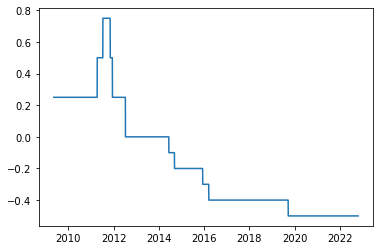

In [4]:
# write down the information about the dates of change of the ECB deposit facility rate and its new values
deposit_rate_list = pd.DataFrame({  
    "trade_date": pd.to_datetime(["2019-09-18", "2016-03-16", "2015-12-9", "2014-09-10", "2014-06-11", "2013-11-13", 
                                  "2013-05-8", "2012-07-11", "2011-12-14", "2011-11-09", "2011-07-13", "2011-04-13", 
                                  "2009-05-13"]),
    "new_deposit_rate": [-0.50, -0.40, -0.30, -0.20, -0.10, 0.00, 0.00, 0.00, 0.25, 0.50, 0.75, 0.50, 0.25]})

# Create a calendar of each of the dates between the first and last date of change of the ECB deposit facility rate
calendar = pd.DataFrame({"trade_date": pd.date_range(deposit_rate_list.trade_date.min(),datetime.datetime.now())})

# merge the 2 previously build data frame 
deposit_rate_data = pd.merge(calendar, deposit_rate_list, on ='trade_date', how ='left')

# fill-in the missing information on the dates where the deposit rate remained the same
for index in deposit_rate_data.index:
    if np.isnan(deposit_rate_data.new_deposit_rate.loc[index]):
        deposit_rate_data.new_deposit_rate.loc[index] = deposit_rate_data.new_deposit_rate.loc[index-1]

# plot the historical deposit facility rate
plt.plot(deposit_rate_data.trade_date,deposit_rate_data.new_deposit_rate)
plt.show

# 2 Build the history of the maintenance periods dates

In [5]:
# Set the path of the maintenance period source file
path = r'C:/Users/VictorLeCoz/OneDrive - Quant Decisions S.L/Documents/PhD/data/MMSR/ECB_maintenance_periods-V0.2.xlsx'

In [6]:
# load the data 
maintenance_periods_list = pd.read_excel(path, sheet_name='export')
maintenance_periods_list

,trade_date,end_maintenance_period
0,2020-03-17,True
1,2020-05-05,True
2,2020-06-09,True
3,2020-07-21,True
4,2020-09-15,True
...,...,...
122,2021-06-15,True
123,2021-07-27,True
124,2021-09-14,True
125,2021-11-02,True


# 3 Build a fake data frame for the mmsr

In [7]:
mmsr_data = pd.DataFrame({"unique_trns_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21, 22,23,24,25],
                   "trade_date": pd.to_datetime(["2020-01-20","2020-01-29","2020-01-22",
                                                 "2020-01-22","2020-01-25","2020-01-26",
                                                 "2020-01-27","2020-01-28","2020-01-29",
                                                 "2020-01-21", "2020-01-27", "2020-01-27",
                                                 "2020-01-27", "2020-01-27", "2020-01-27",
                                                 "2020-01-27", "2020-01-27", "2020-01-27",
                                                 "2020-01-27", "2020-01-26", "2020-01-25", 
                                                 "2020-01-24", "2020-01-22","2020-01-27", "2020-01-27"]),
                   "maturity_band": ["O/N", "O/N","O/N","O/N","O/N","O/N","O/N","O/N","O/N","O/N", "O/N","O/N", "O/N"
                                    ,"O/N","O/N","O/N", "O/N","O/N", "O/N", "O/N","O/N", "O/N", "O/N", "O/N", "O/N"], 
                   "trns_nominal_amt": [156, 558, 56, 89, 148, 28, 4.5, 967, 456, 478, 498, 333, 9.2, 780, 1475, 38, 10, 8, 
                                        10, 11, 12, 11, 10, 11, 10], 
                   "cntp_lei": ["01A", "02A", "03A", "04A", "05A", "06A", "07A", "08A", "08A", "08A", "08A", "08A", "08A", 
                                "01A", "02A", "03A", "04A", "05A", "06A", "06A", "06A", "06A", "06A", "03A", "04A"],
                   "report_agent_lei": ["02A", "01A", "06A", "01A", "08A", "01A", "01A", "05A", "09A", "10A", "10A", "10A",
                                        "10A", "05A", "09A", "10A", "10A", "10A", "07A", "07A", "07A", "07A", "07A", "04A", "05A"],
                   "deal_rate": [0.005, 0.001, 0.002, 0.006, 0.003, 0.001, 0.007, 0.005, 0.004, 0.005, 0.005, 0.005, 0.005, 
                                0.005, 0.004, 0.005, 0.005, 0.005, 0.005, 0.015, 0.001, 0.0025, 0.0025, 0.0025, 0.0025], 
                   "rate_type": ["Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate",
                                 "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", 
                                 "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", 
                                 "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate", "Fixed rate"], 
                   "trns_type": ["SELL", "LEND", "LEND", "LEND", "LEND"
                                , "SELL", "SELL", "SELL", "BUYI", "BORR", "BORR", "LEND", "LEND",
                                "LEND", "LEND", "LEND", "SELL", "SELL", "SELL", "SELL", "SELL", "SELL", "SELL", "SELL", "SELL"], 
                   "instr_type": ["DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST",
                                  "DPST", "DPST", "DPST", "DPST", "DPST", 
                                  "DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST", "DPST"], 
                  })

# 3 Build from data

In [8]:
history = ClassHistory()
history.build_from_data(mmsr_data, deposit_rate_data,maintenance_periods_list)


0 incorect lines in the data base


In [10]:
history.observed_path

{0: <statistics.ClassNetwork at 0x1c121f9d400>,
 1: <statistics.ClassNetwork at 0x1c121f9d310>,
 2: <statistics.ClassNetwork at 0x1c121f9d8b0>,
 3: <statistics.ClassNetwork at 0x1c121f9d1c0>,
 4: <statistics.ClassNetwork at 0x1c121f9d100>,
 5: <statistics.ClassNetwork at 0x1c121f9d070>,
 6: <statistics.ClassNetwork at 0x1c121f9db80>,
 7: <statistics.ClassNetwork at 0x1c121f9dac0>}